# *Optimizing Decision-Making in E-Commerce using Machine Learning and Data Analytics through a Web-Enabled Predictive System*

## Table of Contents

### 1. [Introduction](#Introduction)
  1.1 [Problem Statement](#Problem-Statement)  
  1.2 [Objectives](#Objectives)  
  1.3 [Industry Context and Background](#Industry-Context-and-Background)  
  1.4 [Source of Data](#Source-of-Data)  
  1.5 [Purpose of Study](#Purpose-of-Study)

### 2. [Importing Required Libraries](#Importing-Required-Libraries)

### 3. [Loading the Dataset](#Loading-the-Dataset)

### 4. [Data Understanding](#Data-Understanding)
  4.1 [Column Descriptions](#Column-Descriptions)  
  4.2 [Identification of Numerical and Categorical Columns](#Identification-of-Numerical-and-Categorical-Columns)

### 5. [Data Preprocessing](#Data-Preprocessing)
  5.1 [Removing Duplicate Rows](#Removing-Duplicate-Rows)  
  5.2 [Modifying Column Labels](#Modifying-Column-Labels)  
  5.3 [Handling Missing Values](#Handling-Missing-Values)  
  5.4 [Grouping and Categorizing Cuisines](#Grouping-and-Categorizing-Cuisines)  
  5.5 [Data Cleaning](#Data-Cleaning)  
  5.6 [Dropping Unnecessary Columns](#Dropping-Unnecessary-Columns)  
  5.7 [Geospatial Representation of Data](#Geospatial-Representation-of-Data)  
  5.8 [Handling Outliers](#Handling-Outliers)

### 6. [Data Exploration](#Data-Exploration)
  6.1 [Distribution of Restaurants by Location](#Distribution-of-Restaurants-by-Location)  
  6.2 [Availability of Online Ordering and Table Booking](#Availability-of-Online-Ordering-and-Table-Booking)  
  6.3 [Distribution of Restaurant Types](#Distribution-of-Restaurant-Types)  
  6.4 [Vote Distribution by Location](#Vote-Distribution-by-Location)  
  6.5 [Restaurant Categories by Location](#Restaurant-Categories-by-Location)  
  6.6 [Ratings Distribution Across Cost Categories](#Ratings-Distribution-Across-Cost-Categories)  
  6.7 [Visualization of Restaurant Categories vs Ratings](#Visualization-of-Restaurant-Categories-vs-Ratings)  
  6.8 [Restaurant Types Across Categories](#Restaurant-Types-Across-Categories)  
  6.9 [Distribution of Restaurant Ratings](#Distribution-of-Restaurant-Ratings)  
  6.10 [Analysis of Restaurant Naming Trends](#Analysis-of-Restaurant-Naming-Trends)

### 7. [Statistical Analysis](#Statistical-Analysis)
  7.1 [Correlation between Cost and Rating](#Correlation-between-Cost-and-Rating)  
  7.2 [Correlation between Votes and Rating](#Correlation-between-Votes-and-Rating)  
  7.3 [Correlation between Table Booking Availability and Rating](#Correlation-between-Table-Booking-Availability-and-Rating)  
  7.4 [Correlation between Online Ordering Availability and Rating](#Correlation-between-Online-Ordering-Availability-and-Rating)

### 8. [Machine Learning Pipeline](#Machine-Learning-Pipeline)
  8.1 [Model Building](#Model-Building)  
  8.2 [Model Training, Evaluation, and Selection](#Model-Training,-Evaluation,-and-Selection)

### 9. [Model Evaluation Summary](#Model-Evaluation-Summary)
### 10. [Model Choice Justification](#Model-Choice-Justification)
### 11. [Conclusion](#Conclusion)
### 12. [Future Work](#Future-Work)

## Introduction

#### Problem Statement

This project aims to perform a detailed Exploratory Data Analysis (EDA) on a Zomato restaurant dataset and build a Machine Learning model capable of predicting restaurant ratings based on various features, helping restaurants enhance their services and customer satisfaction.

#### Objectives

- Assist users in choosing top-rated restaurants based on predictive analysis  
- Help restaurant owners understand factors affecting their ratings  
- Leverage machine learning for the accurate prediction of restaurant performance  
- Visualize trends and insights using dynamic dashboards  

#### Industry Context and Background

The Indian restaurant industry has rapidly evolved, with an increasing trend towards online food ordering platforms like Zomato. This project analyzes patterns to assist businesses in better targeting their audience and optimizing offerings.

#### Source of Data

Dataset sourced from Kaggle — a curated version of restaurant information originally scraped from Zomato.

#### Purpose of Study

To analyze key factors affecting restaurant ratings, such as:

- Location and demography  
- Price range  
- Cuisines served  
- Theme-based restaurant concepts  
- Customer preferences in specific neighborhoods  

## Importing Required Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm
from IPython.display import IFrame
import re
from wordcloud import WordCloud
from scipy import stats 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [12]:
df = pd.read_csv("D:\Downloads\zomato.csv")

In [13]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
df.shape

(51717, 17)

## Data Understanding

#### Column Descriptions

| Variable               | Type     | #Unique Values | Description                                                                 |
|------------------------|----------|----------------|-----------------------------------------------------------------------------|
| url                    | object   | 51,717         | contains the URL of the restaurant on the Zomato web-site                   |
| address                | object   | 11,495         | contains the address of the restaurant in Bengaluru                        |
| name                   | object   | 8,792          | contains the name of the restaurant                                        |
| online_order           | category | 2              | whether online ordering is available in the restaurant or not             |
| book_table             | category | 2              | table booking option available or not                                     |
| rate                   | object   | 64             | contains the overall rating of the restaurant out of 5                    |
| votes                  | int      | 2,328          | contains the total number of ratings for the restaurant as of the above mentioned date  |
| phone                  | object   | 64             | contains the phone number of the restaurant                               |
| location               | category | 93             | contains the neighborhood in which the restaurant is located              |
| rest_type              | category | 93             | restaurant type                                                            |
| dish_liked             | object   | 5,271          | dishes people liked in the restaurant                                     |
| cuisines               | object   | 2,723          | food styles, separated by comma                                           |
| approx_cost(for two people) | float | 70          | contains the approximate cost for meal for two people                     |
| reviews_list           | object   | 22,513         | list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer                 |
| menu_item              | object   | 9,098          | contains the list of menus available in the restaurant                        |
| listed_in(type)        | category | 7              | type of meal                                                               |
| listed_in(city)        | category | 30             | contains the neighborhood in which the restaurant is listed               |


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [19]:
df.describe(include ="all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insights**

* The dataset contains 51,717 restaurant records with rich details about service offerings, location, and customer feedback.
* The `url` field is fully unique and can serve as a reliable identifier for each restaurant entry.
* There are only 8,792 unique restaurant names, suggesting many restaurants operate in multiple locations or under chain franchises (e.g., "Cafe Coffee Day" appears 96 times).
* Approximately 15% of restaurants do not have a rating (`rate` column), and a large portion are labeled as "NEW," indicating newly listed or unrated entries.
* The number of votes per restaurant is highly skewed, with an average of 284 votes but a maximum of 16,832, and 75% of restaurants having fewer than 198 votes.
* Online ordering is supported by about 59% of the restaurants, indicating a strong shift toward digital convenience.
* About 13% of restaurants offer a table booking option, reflecting the dominance of casual and quick-service dining formats in the region.
* The `location` and `rest_type` columns each have 93 unique values, suggesting wide geographic distribution and diverse restaurant categories.
* There are 2,723 unique cuisine combinations and over 9,000 distinct menu items, showing significant culinary variety in the Bengaluru restaurant market.
* The `dish_liked` and `reviews_list` columns have high proportions of missing data, indicating that customer-written feedback is not consistently available.
* The most common cost for two people is ₹300, with 70 unique cost values overall, pointing to an affordability trend among most restaurants.
* Only 7 types of meals (`listed_in(type)`) and 30 city zones (`listed_in(city)`) are recorded, offering moderate segmentation in dining categories and regions.

#### Identification of Numerical and Categorical Columns

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']     # List numerical features (non-object columns)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']     # List categorical features (object columns)

# Print the number of features and their names
print(f'Numerical features: {len(numeric_features)} - {numeric_features}')
print(f'Categorical features: {len(categorical_features)} - {categorical_features}')

Numerical features: 1 - ['votes']
Categorical features: 16 - ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


## Data Preprocessing

#### Removing Duplicate Rows

In [25]:
df.duplicated().sum()

0

**Insights**

* There are no duplicate values in the dataset.

#### Modifying Column Labels

In [28]:
# Rename columns to have more descriptive names:
# 'approx_cost(for two people)' -> 'cost2plates'
# 'listed_in(type)' -> 'category'
# 'listed_in(city)' -> 'city'
df.rename(columns = {'approx_cost(for two people)':'cost2plates', 
                     'listed_in(type)':'category', 
                     'listed_in(city)': 'city'}, inplace = True)

#### Handling Missing Values

In [30]:
df.isna().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost2plates       346
reviews_list        0
menu_item           0
category            0
city                0
dtype: int64

**Insights**

* `rate` has 7,775 missing values, meaning around **15%** of the restaurants do not have any rating.
* `phone` is missing for 1,208 entries, which may affect contact-based features or user convenience.
* `location` has 21 missing values and `rest_type` has 227 missing values — these should be addressed if location-based analysis or filtering by restaurant type is required.
* `dish_liked` is missing in 28,078 entries, which is over **54%** of the data, suggesting most users do not specify favorite dishes.
* `cuisines` has 45 missing entries, which is relatively low and unlikely to impact cuisine-level analysis significantly.
* `cost2plates` is missing in 346 entries — a small but notable portion if cost prediction or segmentation is involved.
* Columns like `url`, `address`, `name`, `online_order`, `book_table`, `votes`, `reviews_list`, `menu_item`, `category`, and `city ` have **no missing values**, indicating strong data integrity for identification, classification, and user interaction elements.

##### Handling missing values in the `rate` column

In [33]:
print(df['rate'].unique())     # Print unique values in the 'rate' column before any changes
df['rate'].replace(['NEW', '-'], np.nan, inplace=True)     # Replace 'NEW' and '-' with NaN (Not a Number) in the 'rate' column
df['rate'] = df['rate'].str.split('/').str[0]     # Split the 'rate' column by '/' and keep the first part (before the slash)
df['rate'] = df['rate'].astype(float)     # Convert the 'rate' column values to floats
df['rate'].fillna(df['rate'].mean().round(1), inplace=True)     # Fill NaN values with the mean of the 'rate' column, rounded to 1 decimal place
df['rate'].unique()     # Print unique values in the 'rate' column after cleaning

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

##### Handling missing values in the `location` column

In [35]:
# Group the data by 'city', and for each city, find the most frequent value (mode) of the 'location' column.
# If the mode is not empty, return the first mode; otherwise, return None.
grouped_mode = df.groupby('city')['location'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill NaN values in the 'location' column with the most frequent location for the corresponding city
df['location'] = df['location'].fillna(df['city'].map(grouped_mode))

print(df['location'].isna().sum())     # Print the count of remaining NaN values in the 'location' column

0


In [36]:
# Drop the 'city' column since it is no longer needed
df.drop('city', axis=1, inplace=True)

##### Handling missing values in `rest_type` column

In [38]:
# Fill missing values (NaN) in the 'rest_type' column with the most frequent value (mode)
df['rest_type'].fillna(df['rest_type'].mode()[0], inplace=True)
df['rest_type'].isna().sum()     # Print the count of remaining NaN values in the 'rest_type' column

0

##### Handling missing values in `cost2plates` column

In [40]:
# Remove commas from the 'cost2plates' column (e.g., "2,500" becomes "2500")
df['cost2plates'].replace(',', '', regex=True, inplace=True)
df['cost2plates'] = df['cost2plates'].astype(float)     # Convert the 'cost2plates' column to float type for numerical operations

# Fill missing values in 'cost2plates' with the mean of the column, rounded to 1 decimal place
df['cost2plates'].fillna(df['cost2plates'].mean().round(1), inplace=True)
df['cost2plates'].isna().sum()     # Print the count of remaining NaN values in the 'cost2plates' column

0

#### Grouping and Categorizing Cuisines

In [42]:
def group_cuisines(cuisines):
    # Categorize Indian regional cuisines under broader 'North', 'South', 'West', and 'East' labels
    if any(region in cuisines for region in ['North Indian', 'Punjabi', 'Mughlai', 'Rajasthani', 'Kashmiri', 'Awadhi']):
        return 'North Indian Cuisine'
    elif any(region in cuisines for region in ['South Indian', 'Tamil Nadu', 'Kerala', 'Andhra', 'Karnataka', 'Telangana']):
        return 'South Indian Cuisine'
    elif any(region in cuisines for region in ['West Indian', 'Gujarati', 'Maharashtrian', 'Goan']):
        return 'West Indian Cuisine'
    elif any(region in cuisines for region in ['East Indian', 'Bengali', 'Oriya', 'Assamese']):
        return 'East Indian Cuisine'
    elif any(region in cuisines for region in ['Mughlai', 'Biryani', 'Kebab', 'Hyderabadi']):
        return 'Mughlai & Hyderabadi Cuisine'
    elif any(region in cuisines for region in ['Indo-Chinese', 'Fusion', 'Street Food']):
        return 'Fusion/Contemporary Indian Cuisine'

    # Group East and Southeast Asian cuisines
    elif any(cuisine_type in cuisines for cuisine_type in ['Chinese', 'Asian', 'Japanese', 'Thai', 'Vietnamese', 'Momos']):
        return 'Asian Cuisine'

    # Group Western cuisines such as Italian, American, Mediterranean, etc.
    elif any(cuisine_type in cuisines for cuisine_type in ['American', 'Continental', 'Italian', 'Mediterranean', 'Pizza', 'BBQ', 'Steak', 'European']):
        return 'Western Cuisine'

    # Group fast food and common Indian street snacks
    elif any(cuisine_type in cuisines for cuisine_type in ['Fast Food', 'Street Food', 'Burger', 'Rolls', 'Sandwich']):
        return 'Fast Food & Street Food'

    # Group sweet dishes and beverages
    elif any(cuisine_type in cuisines for cuisine_type in ['Desserts', 'Ice Cream', 'Cakes', 'Beverages', 'Juices']):
        return 'Desserts & Beverages'

    # Group healthy food categories
    elif any(cuisine_type in cuisines for cuisine_type in ['Healthy Food', 'Vegan', 'Salad']):
        return 'Healthy & Vegan'

    # Identify seafood-specific entries
    elif 'Seafood' in cuisines or 'Fish' in cuisines:
        return 'Seafood'

    # If no specific category matches, classify under miscellaneous
    else:
        return 'Fusion & Miscellaneous'

# Apply the cuisine grouping function to the 'cuisines' column
# If the value is a string, apply the function; otherwise assign 'Other'
df['grouped_cuisines'] = df['cuisines'].apply(lambda x: group_cuisines(x) if isinstance(x, str) else 'Other')
df['grouped_cuisines'].value_counts()     # Display the count of each grouped cuisine category

grouped_cuisines
North Indian Cuisine                  21483
Desserts & Beverages                   5216
Western Cuisine                        5013
South Indian Cuisine                   4869
Fast Food & Street Food                4550
Asian Cuisine                          3915
Fusion & Miscellaneous                 2543
Mughlai & Hyderabadi Cuisine           1961
Fusion/Contemporary Indian Cuisine     1289
East Indian Cuisine                     271
West Indian Cuisine                     215
Healthy & Vegan                         197
Seafood                                 150
Other                                    45
Name: count, dtype: int64

In [43]:
# Drop the 'cuisines' column
df = df.drop(columns=['cuisines'])

#### Data Cleaning

##### Cleaning the `name` Column

In [46]:
name_counts = df['name'].value_counts()     # Get the value counts for 'name' column (restaurant names)
df['name'] = df['name'].str.lower()     # Convert all restaurant names to lowercase for uniformity
name_1 = name_counts[name_counts < 4]     # Get the restaurant types (names) that appear less than 4 times

# Function to handle restaurant names that appear less than 4 times by grouping them as 'others'
def handle_rest_type(value):
    if value in name_1:
        return 'others'
    else:
        return value

df['name'] = df['name'].apply(handle_rest_type)     # Apply the function to the 'name' column
print(df['name'].nunique())     # Print the number of unique restaurant names after the transformation

8739


##### Cleaning the `rest_type` Column

In [48]:
rest_type_counts = df['rest_type'].value_counts()  # Get the value counts for 'rest_type' column (restaurant types)
rest_types_1 = rest_type_counts[rest_type_counts < 500].index  # Get the restaurant types that appear less than 500 times

# Function to handle restaurant types that appear less than 500 times by grouping them as 'Others'
def handle_rest_type(value):
    if value in rest_types_1:
        return 'Others'
    else:
        return value

df['rest_type'] = df['rest_type'].apply(handle_rest_type)  # Apply the function to the 'rest_type' column
df['rest_type'].value_counts()  # Display the value counts of the 'rest_type' column after transformation

rest_type
Quick Bites           19359
Casual Dining         10330
Others                 6909
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Food Court              624
Name: count, dtype: int64

##### Cleaning the `location` Column

In [50]:
location = df['location'].value_counts(ascending=False)     # Get the value counts for 'location' column
location_1 = location[location < 100]     # Get the locations that appear less than 100 times

# Function to handle locations that appear less than 100 times by grouping them as 'Others'
def handle_location(value):
    if value in location_1:
        return 'Others' 
    else:
        return value

df['location'] = df['location'].apply(handle_location)     # Apply the function to the 'location' column
df['location'].value_counts()     # Display the value counts of the 'location' column after transformation

location
BTM                           5134
HSR                           2524
Koramangala 5th Block         2504
JP Nagar                      2235
Whitefield                    2144
                              ... 
ITPL Main Road, Whitefield     113
South Bangalore                107
Koramangala 2nd Block          102
Hosur Road                     102
Kaggadasapura                  101
Name: count, Length: 66, dtype: int64

#### Dropping Unnecessary Columns

In [52]:
df = df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis = 1)
print(df.shape)
df.head(1)

(51717, 10)


,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines
0,jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine


#### Geospatial Representation of Data

In [54]:
# Convert unique locations to a list
locations = df['location'].unique().tolist()
# Remove 'Others' and 'Bangalore' from the list
locations = [location for location in locations if location not in ['Others', 'Bangalore']]

In [55]:
locations_full = [loc + ", Bangalore" for loc in locations]     # Add 'Bangalore' to each for better geocoding
df1 = pd.DataFrame(locations_full, columns=["location"])

# Geocoding setup
geolocator = Nominatim(user_agent="bangalore_mapper")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=3)

# Show progress
tqdm.pandas()
df1["geo"] = df1["location"].progress_apply(lambda loc: geocode(loc, timeout=10))

# Check if any location has not been geocoded properly
missing_locations = df1[df1["geo"].isnull()]["location"]
if not missing_locations.empty:
    print(f"These locations were not geocoded successfully: \n{missing_locations.tolist()}")

# Extract lat and lon if geocoding successful
df1["lat"] = df1["geo"].apply(lambda x: x.latitude if x else None)
df1["lon"] = df1["geo"].apply(lambda x: x.longitude if x else None)

# Drop any unfound locations
df1 = df1.dropna(subset=["lat", "lon"])

# Create the map centered at Bangalore
map_blr = folium.Map(location=[12.9716, 77.5946], zoom_start=11)

# Add markers
for _, row in df1.iterrows():
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=row["location"].replace(", Bangalore", ""),
        tooltip=row["location"].replace(", Bangalore", "")
    ).add_to(map_blr)

# Save map
map_blr.save("bangalore_map.html")
print("Map saved as bangalore_map.html")

100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [01:04<00:00,  1.01it/s]


Map saved as bangalore_map.html


In [56]:
map_path = "bangalore_map.html"     # Path to the saved map
IFrame(map_path, width=1080, height=400)     # Display the map in the notebook

#### Handling Outliers

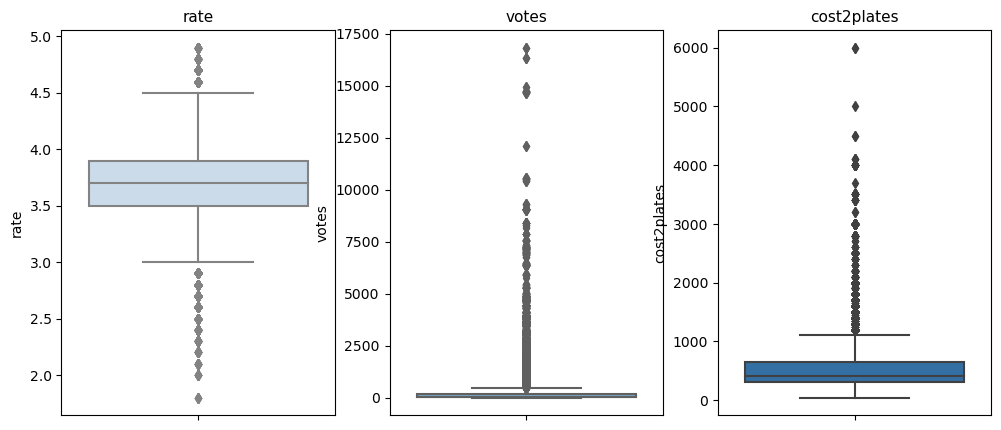

In [58]:
cols = df.select_dtypes(include='number').columns[:3]
colors = sns.color_palette("Blues", n_colors=3)
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
for ax, col, c in zip(axs, cols, colors):
    sns.boxplot(y=df[col], ax=ax, color=c)
    ax.set_title(f'{col}', fontsize=11)

plt.show()

##### Handling Outliers in `votes` column

In [60]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of the 'votes' column
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)
IQR = Q3 - Q1     # Calculate the Interquartile Range (IQR)
upper_bound = Q3 + 1.5 * IQR     # Define the upper bound for outliers (1.5 * IQR above the 75th percentile)
median_value = df['votes'].median()
df['votes'] = np.where(df['votes'] > upper_bound, median_value, df['votes'])     # Replace any values above the upper bound with the median value
df['votes'] = df['votes'].astype(int)     # Ensure the 'votes' column is of integer type after replacing outliers
print(df['votes'].max())     # Print the maximum value in the 'votes' column after outlier treatment

484


##### Handling Outliers in `cost2plates` column

In [62]:
# Calculate the 25th percentile (Q1) and the 75th percentile (Q3) of the 'cost2plates' column
Q1 = df['cost2plates'].quantile(0.25)
Q3 = df['cost2plates'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
median_value = df['cost2plates'].median()
df['cost2plates'] = np.where(df['cost2plates'] > upper_bound, median_value, df['cost2plates'])
print(df['cost2plates'].max())

1100.0


## Data Exploration

#### Distribution of Restaurants by Location

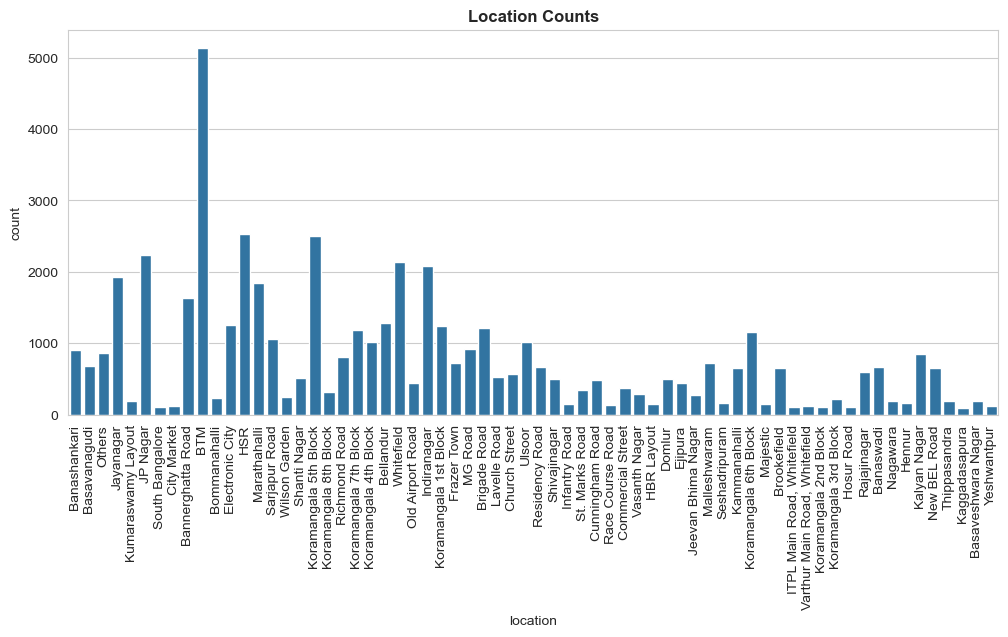

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.countplot(x="location", data=df, color='#1f77b4')
plt.xticks(rotation=90, fontsize=10)     # Rotate x-axis labels
plt.yticks(fontsize=10)
plt.title('Location Counts', fontsize=12, fontweight='bold')
plt.show()

**Insights**

* BTM Layout has the highest count (over 5000), indicating a major concentration of data points or activity in that location.
* Koramangala (specifically 5th Block) and HSR Layout also show high counts (around 2500), suggesting they are among the most significant areas in the dataset.
* Indiranagar, Whitefield, and JP Nagar are moderately high in count (1500–2200 range), showing steady activity or presence.
* Multiple blocks of Koramangala (3rd to 8th) appear with substantial counts, highlighting the area's consistent relevance and granularity in data capture.
* Several locations, such as St. Marks Road, Racecourse Road, and Hosur Road, have very low counts (<500), pointing to either low activity or limited data representation.
* The distribution is right-skewed, with a few locations having very high counts and a long tail of less frequent locations.


#### Availability of Online Ordering and Table Booking  

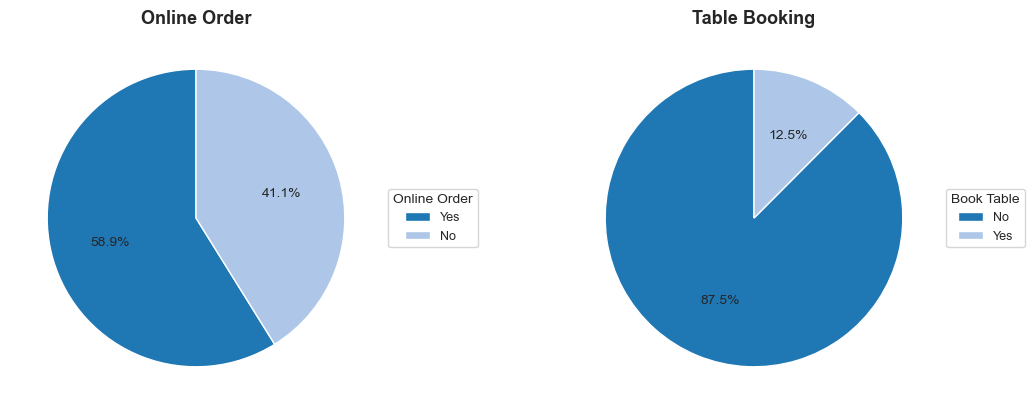

In [68]:
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'wspace': 0.5})     # Define figure and grid specs
colors = ['#1f77b4', '#aec7e8']     # Define color palette
# Plot 1: Online Order
online_order = df["online_order"].value_counts()
ax1.pie(online_order, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10})
ax1.set_title('Online Order', fontsize=13, fontweight='bold')
ax1.legend(online_order.index, title="Online Order", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

# Plot 2: Table Booking
book_table = df["book_table"].value_counts()
ax2.pie(book_table, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10})
ax2.set_title('Table Booking', fontsize=13, fontweight='bold')
ax2.legend(book_table.index, title="Book Table", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

plt.show()

#### Distribution of Restaurant Types

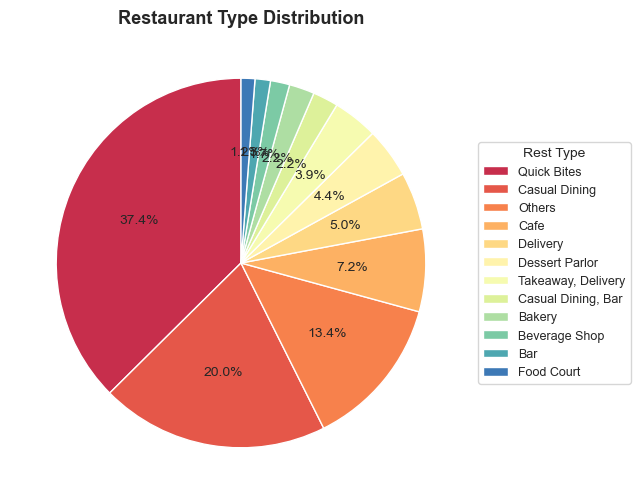

In [70]:
top = round(df['rest_type'].value_counts() / df.shape[0] * 100, 2)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
colors = sns.color_palette("Spectral", len(top))
ax.pie(top, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 10})
ax.set_title("Restaurant Type Distribution", fontsize=13, fontweight='bold')
ax.legend(top.index, title="Rest Type", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)
plt.show()

#### Vote Distribution by Location

In [72]:
location_votes_df = df[['location', 'votes']]
total_votes_by_location = location_votes_df.groupby(['location'])['votes'].sum()     # Group by Location and sum the Votes
total_votes_by_location = total_votes_by_location.to_frame()
total_votes_by_location = total_votes_by_location.sort_values('votes', ascending=False)

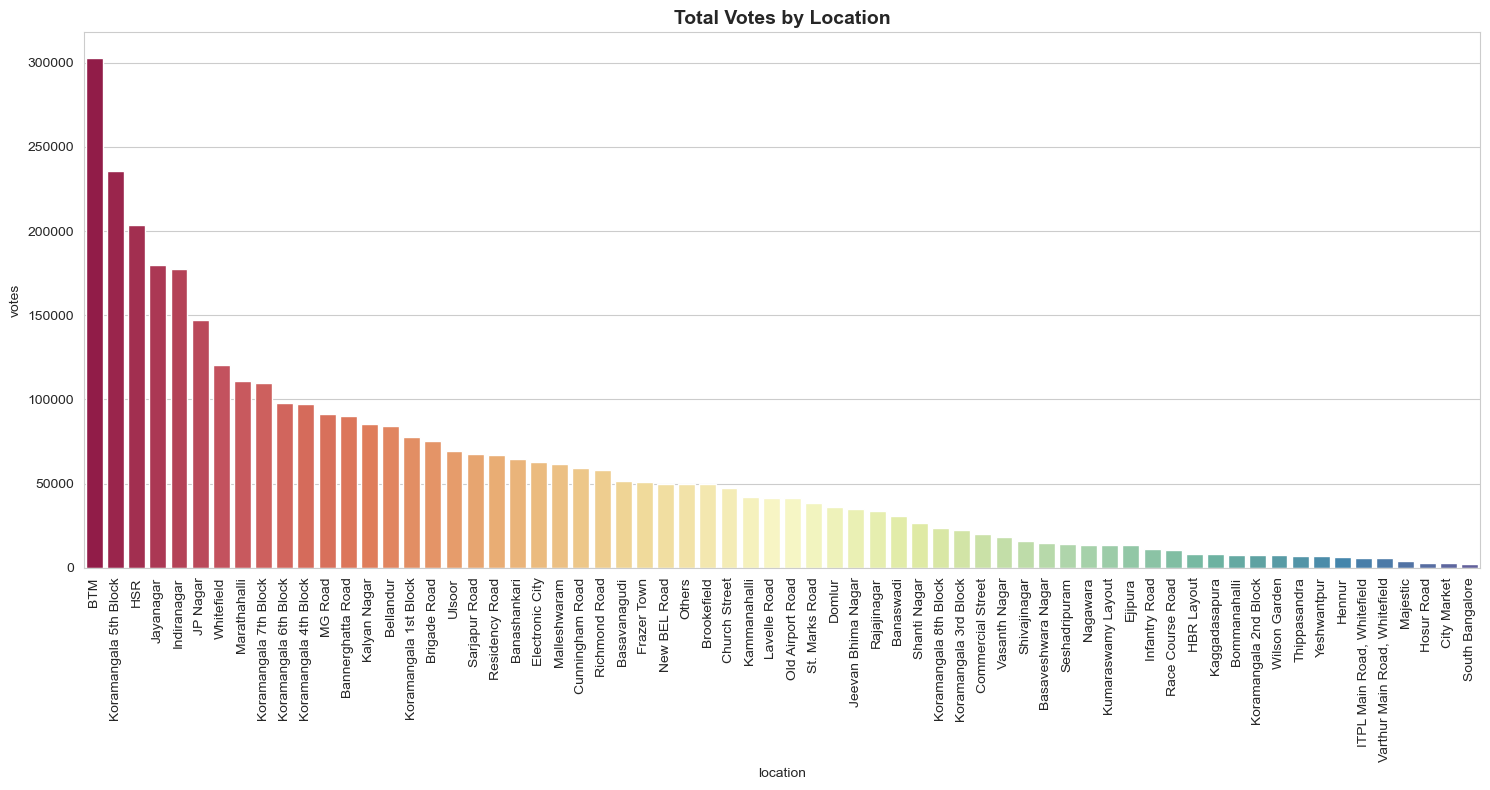

In [73]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x=total_votes_by_location.index, y=total_votes_by_location['votes'], palette="Spectral")
plt.xticks(rotation=90)
plt.title('Total Votes by Location', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Restaurant Categories by Location  

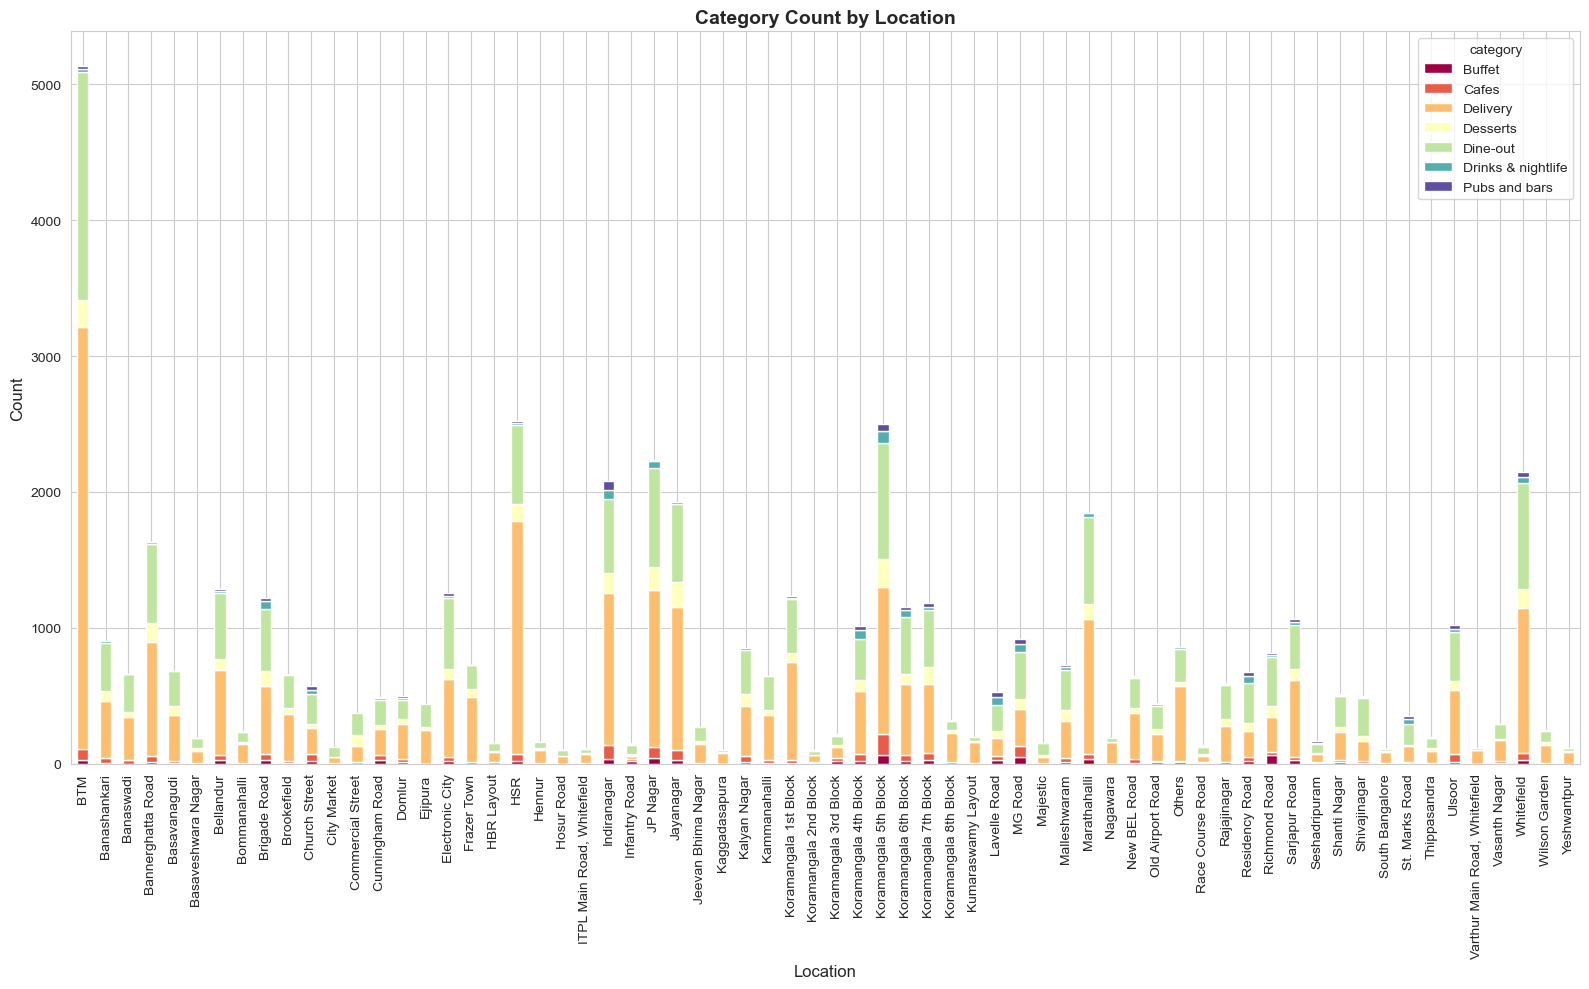

In [75]:
df2 = df.groupby(['location', 'category']).size().unstack().fillna(0)
sns.set_style("whitegrid")
ax = df2.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='Spectral')
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Category Count by Location', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights**

* BTM stands out with the highest overall activity across all categories, especially in **Delivery**, **Dine-out**, and **Cafes**, making it a major hub for food services.
* Koramangala (particularly 5th Block) and Indiranagar also exhibit high counts across diverse categories, indicating these areas are vibrant food and nightlife zones.
* HSR Layout, Whitefield, and JP Nagar show significant volumes, with **Delivery** and **Dine-out** services being dominant, followed by a notable presence of **Desserts** and **Cafes**.
* Categories such as **Buffet** and **Pubs and Bars** appear less frequently across most locations, but have stronger representation in nightlife-centric areas like Indiranagar and Koramangala.
* Locations like Electronic City, Marathahalli, and Bellandur display a balanced distribution across categories, pointing to a mix of residential and commercial demand.
* Several areas, such as Race Course Road, Hosur Road, and South Bangalore, show minimal activity across all categories.
* The distribution suggests that most high-count locations offer a wide variety of services, while low-count regions tend to specialize in fewer categories (mainly Delivery or Dine-out).
* Delivery dominates as the most common category across almost all areas, reflecting strong consumer demand for off-premise dining.

#### Ratings Distribution Across Cost Categories 

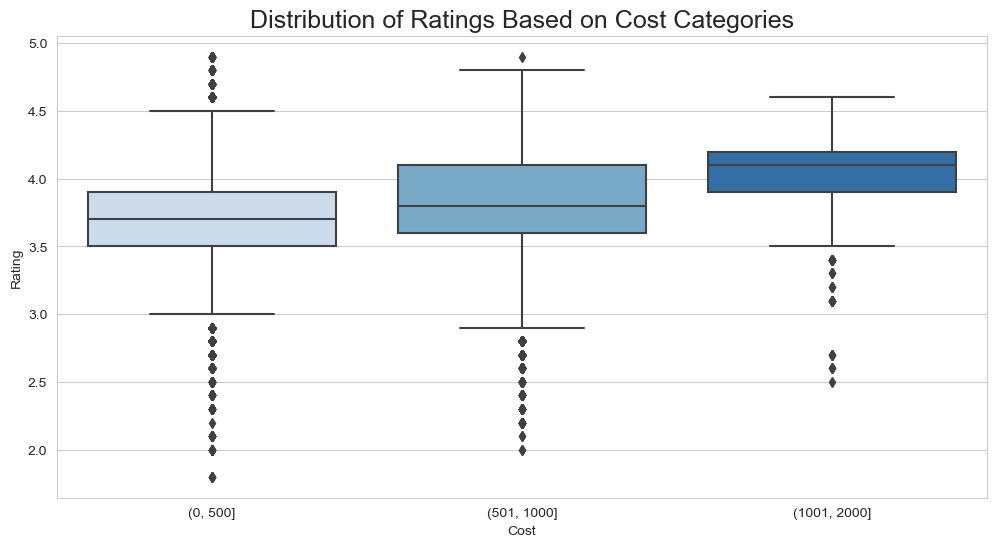

In [78]:
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000)])     # Bin the cost data into categories
df['cost_cat'] = pd.cut(df['cost2plates'], bins)  # Creating a new column based on cost categories

# Create the box plot
plt.figure(figsize=(12,6)) 
ax = sns.boxplot(x="cost_cat", y="rate", data=df, palette="Blues")  
ax.set_xlabel('Cost') 
ax.set_ylabel('Rating') 
ax.set_title('Distribution of Ratings Based on Cost Categories', fontsize=18)

df.drop('cost_cat', axis=1, inplace=True)     # Remove the 'cost_cat' column after plotting
plt.show()  # Show the plot

**Insights**

* A **positive correlation** is evident between cost and ratings — higher-cost categories generally receive better customer ratings.
* The **(0, 500]** cost category has the **lowest median rating (\~3.7)** and the **widest spread** of ratings, indicating greater inconsistency in customer satisfaction among lower-priced restaurants.
* The **(501, 1000]** category shows a **slightly higher median (\~3.9)** with more consistency than the lowest tier, though still exhibiting a fair number of low-rating outliers.
* The **(1001, 2000]** category has the **highest median rating (\~4.1)** and the **tightest interquartile range (IQR)**, signifying more reliable service and customer satisfaction at higher price points.
* Outliers are present in all cost categories but are **more frequent in lower-cost segments**, reflecting variability in quality among budget options.

#### Visualization of Restaurant Categories vs Ratings

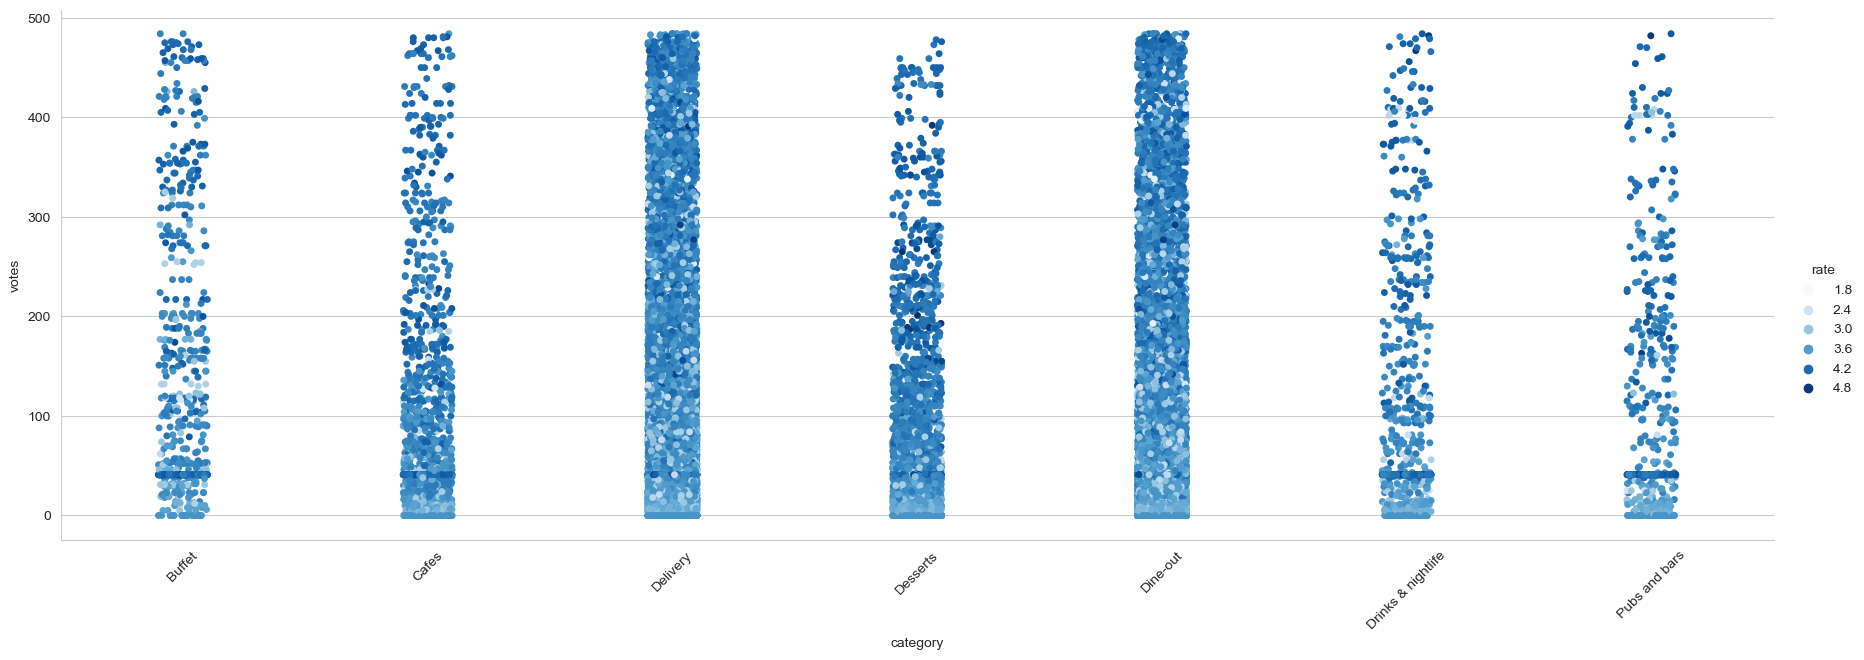

In [81]:
# Create a categorical plot to show votes per category, colored by rating
sns.catplot(x='category', y='votes', hue='rate', data=df, palette='Blues', height=6, aspect=3)
plt.xticks(rotation=45)
plt.show()

**Insights**

* Delivery and Dine-out categories receive the highest number of votes, indicating strong customer interest and popularity.
* Desserts and Cafes also show significant customer engagement, suggesting they are preferred for social and leisure dining.
* Buffets, 'Drinks and nightlife', and 'pubs and bars' services display a wider range of ratings, indicating variability in quality or service consistency.
* Underperforming categories like Buffet could benefit from service improvements or repositioning to boost customer experience.

#### Restaurant Types Across Categories 

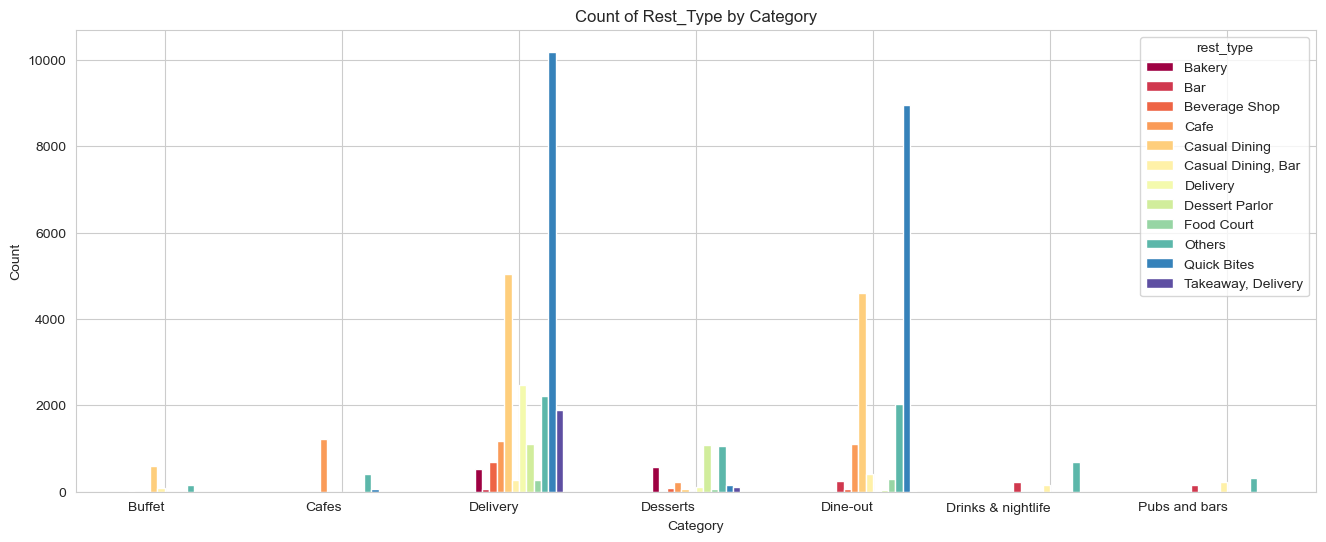

In [84]:
# Prepare data
df2 = df.groupby('category')['rest_type'].value_counts().unstack().fillna(0)

# Plot
df2.plot(kind='bar', figsize=(16, 6), colormap='Spectral')
plt.title('Count of Rest_Type by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.show()

**Insights**

* **Delivery** is the most dominant category overall, with an especially high count for the **Quick Bites** rest_type, followed by **Casual Dining** and **Delivery** — indicating a strong customer preference for convenience-based services.
* **Dine-out** follows closely, showing diversity across rest_types — especially **Casual Dining**, **Quick Bites**, and **Others**. This highlights dine-out as a more experience-driven and versatile category.
* **Cafes** are primarily dominated by the **Cafe** rest_type (as expected), but also include notable contributions from **Quick Bites** and **Others**, suggesting some hybrid models exist.
* **Desserts** category sees a strong presence of **Dessert Parlor** and **Bakery**, indicating a clear thematic alignment with sweet/snack offerings.
* **Drinks & Nightlife** is driven mainly by the **Bar** and **Casual Dining, Bar** types, aligning well with social and evening-centric service models.
* **Pubs and Bars** also reflect a similar composition to **Drinks & Nightlife**, but with much lower volume.
* **Buffet** is largely contributed by **Casual Dining**, reflecting its alignment with structured, formal meal setups, but is the least common category overall.

#### Distribution of Restaurant Ratings  

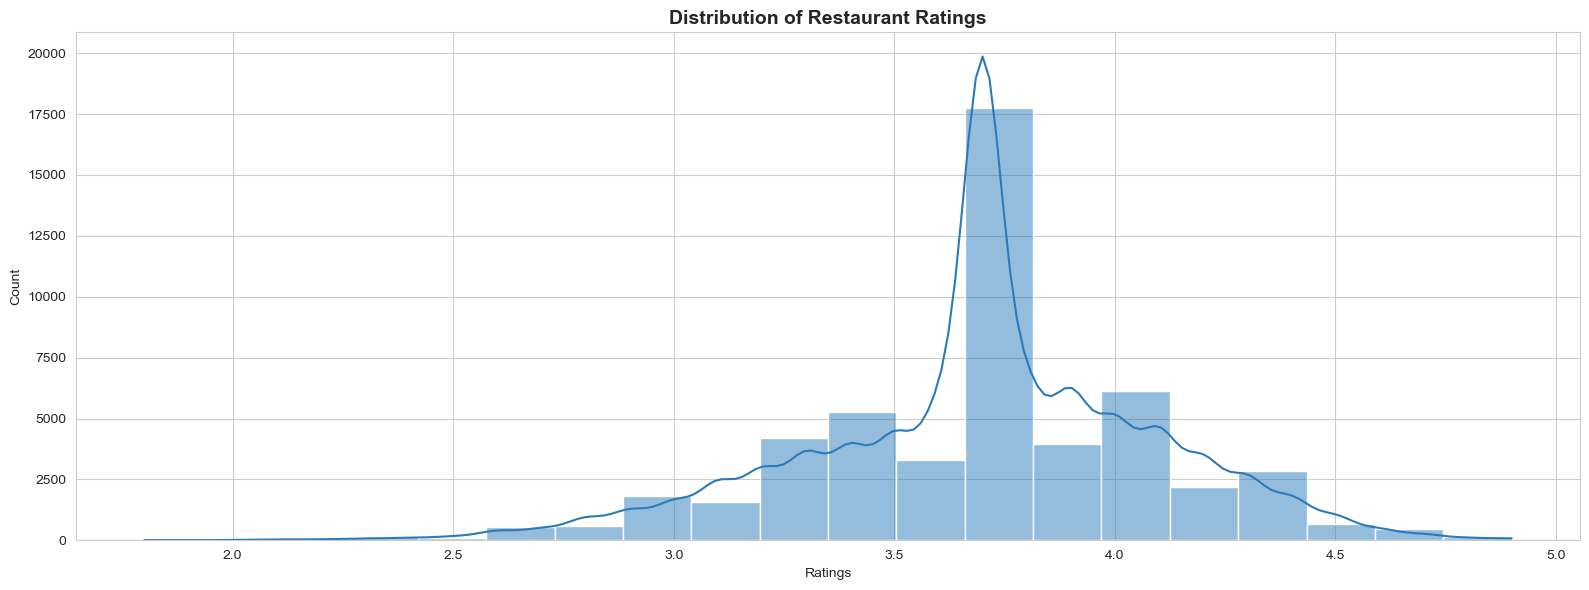

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.histplot(df['rate'], bins=20, kde=True, color=sns.color_palette("Blues")[4])
plt.title("Distribution of Restaurant Ratings", fontsize=14, fontweight='bold')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Insights**

* **Majority of ratings cluster around 3.7 to 3.9**, forming a sharp peak, indicating that most restaurants tend to receive moderately high ratings rather than extreme scores.
* The distribution is **left-skewed**, meaning there are fewer restaurants with very low ratings compared to those in the 3.0–4.0 range.
* **Very low ratings (<2.5)** are rare, suggesting a generally favorable customer perception or a potential bias in rating submissions.
* The **long tail beyond 4.0** implies that while excellent-rated restaurants exist, they are significantly fewer.

#### Analysis of Restaurant Naming Trends

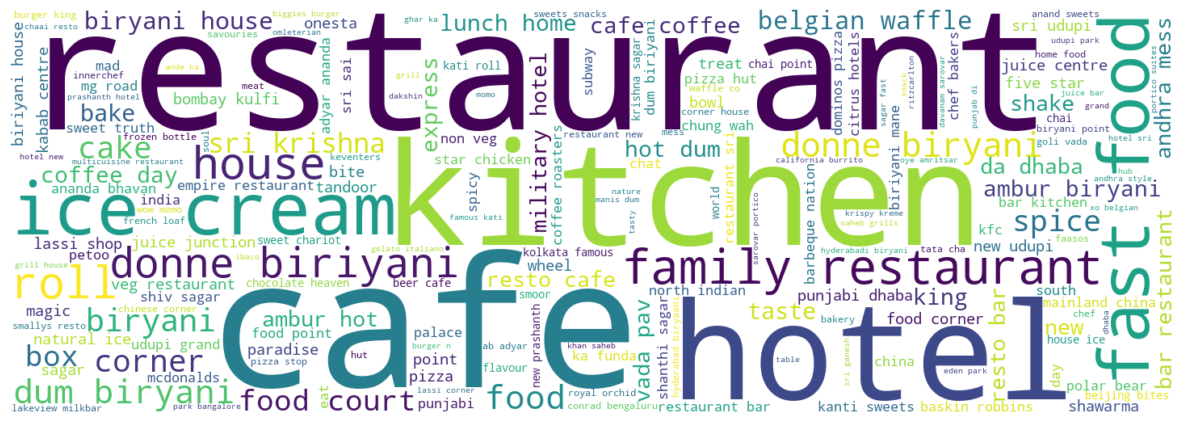

In [90]:
text = ' '.join(df['name'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower())))
wordcloud = WordCloud(
    width=1440,               
    height=500,              
    background_color='white'  
).generate(text)                # generate word cloud from text

plt.figure(figsize=(15, 15))   
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis('off')                
plt.show()                   

**Insights**

* The most common words in restaurant names are "restaurant", "cafe", "hotel", and "kitchen", indicating popular naming conventions in the food industry.
* Regional Indian cuisine is heavily represented, with terms like "biryani", "dum biryani", "udupi", and "punjabi" appearing frequently.
* There is strong visibility of dessert and beverage items such as "ice cream", "cake", "juice", and "waffle", highlighting their popularity.
* Well-known fast food and international chains like "kfc", "mcdonalds", "dominos pizza", "belgian waffle", "natural ice", and "baskin robbins" are mentioned, suggesting their high footprint.
* Names like "kabab centre", "ananda bhavan", and "military hotel" point to the prominence of certain local or regional restaurant chains.
* The diversity of terms used reflects a vibrant mix of traditional Indian eateries, fast food outlets, and modern cafes.

## Statistical Analysis

#### Correlation between Cost and Rating 

**Null Hypothesis:** There is no significant relationship between the restaurant rating and the price (cost for two people).

**Alternative Hypothesis:** There is a significant relationship between the restaurant rating and the price (cost for two people).

In [95]:
pearson_coef, p_value = stats.pearsonr(df['cost2plates'], df['rate'])
print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.15776138569403372
P-value:  2.0702348041135014e-285


**Interpretation**

The **Pearson correlation coefficient** of **0.158** indicates a **weak positive correlation** between the cost for two people and the restaurant rating. The **p-value** of **2.07e-285** is extremely small, showing that the relationship is **statistically significant**. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between the two variables, although the correlation is weak.

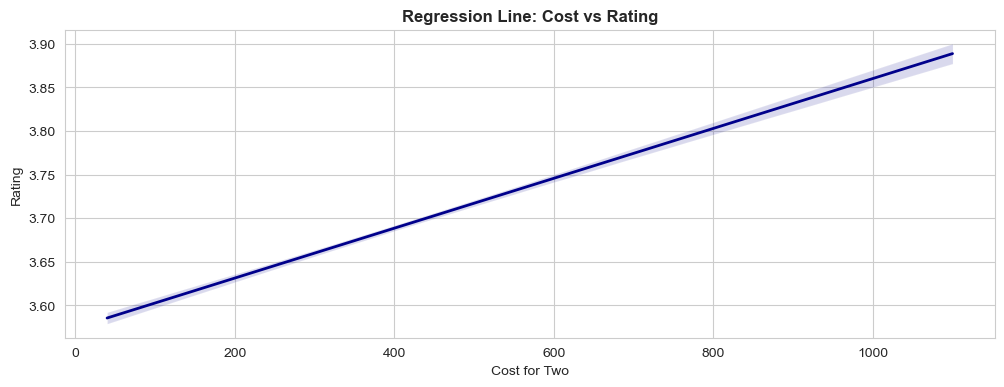

In [97]:
# Regression Plot 
sns.regplot(x='cost2plates', y='rate', data=df, scatter=False,
            line_kws={'color': 'darkblue', 'lw': 2})
plt.title("Regression Line: Cost vs Rating", fontsize=12, fontweight='bold')
plt.gcf().set_size_inches(12, 4)
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

**Insights**

* The regression line shows a positive slope, meaning as the cost for two increases, the average rating also tends to increase.
* The slope is shallow, indicating that while ratings increase with cost, the relationship is weak.
* The narrow confidence interval suggests that the model's predictions are fairly precise within this range.

#### Correlation between Votes and Rating

**Null Hypothesis:** There is no significant relationship between votes and the restaurant rating.

**Alternative Hypothesis:** There is a significant relationship between votes and the restaurant rating.

In [101]:
pearson_coef, p_value = stats.pearsonr(df['votes'], df['rate'])
print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.2272433496507142
P-value:  0.0


**Interpretation**

The **Pearson correlation coefficient** of **0.227** indicates a **weak positive correlation** between the two variables. The **p-value** of **0.0** is extremely small, showing that the relationship is **statistically significant**. Therefore, we reject the null hypothesis and conclude that there is a significant relationship between the two variables, although the correlation is still weak.

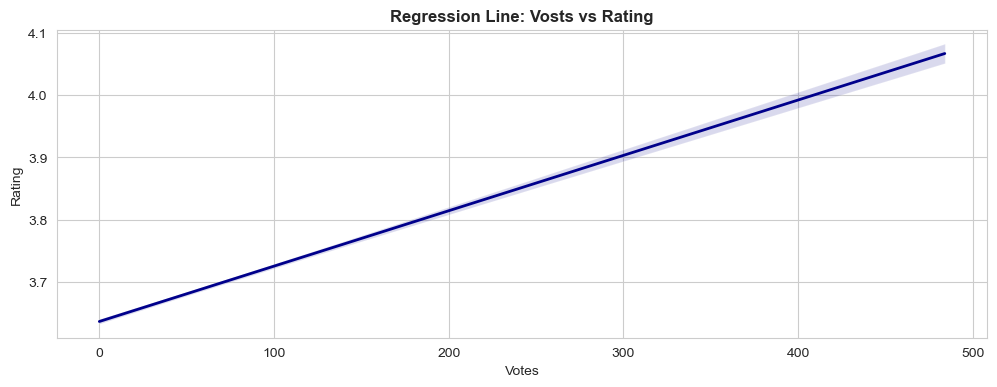

In [103]:
# Regression Plot 
sns.regplot(x='votes', y='rate', data=df, scatter=False,
            line_kws={'color': 'darkblue', 'lw': 2})
plt.title("Regression Line: Vosts vs Rating", fontsize=12, fontweight='bold')
plt.gcf().set_size_inches(12, 4)
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

**Insights**

* There is a clear positive linear relationship between the number of votes and the rating, indicating that as the number of customer votes increases, the rating tends to be higher.
* The regression line fits the data closely, suggesting a good predictive capability between votes and ratings.
* The confidence interval (shaded region) is narrow, implying a high level of certainty in the relationship across the observed range of votes.
* This insight supports the idea that user engagement is a key indicator of perceived quality in the rating system.

#### Correlation between Table Booking Availability and Rating 

**Null Hypothesis:** There is no significant relationship between table booking availability and the restaurant rating.

**Alternative Hypothesis:** There is a significant relationship between table booking availability and the restaurant rating.

In [107]:
pearson_coef, p_value = stats.pearsonr(df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0), df['rate'])
print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.41347420866587514
P-value:  0.0


**Interpretation**

The **Pearson Correlation Coefficient** of **0.413** indicates a **moderate positive correlation** between the two variables. The **p-value** of **0.0** is extremely small, indicating that the observed correlation is **statistically significant**. Therefore, we reject the null hypothesis and conclude that there is a meaningful relationship between the two variables, even though the strength of the correlation is moderate.

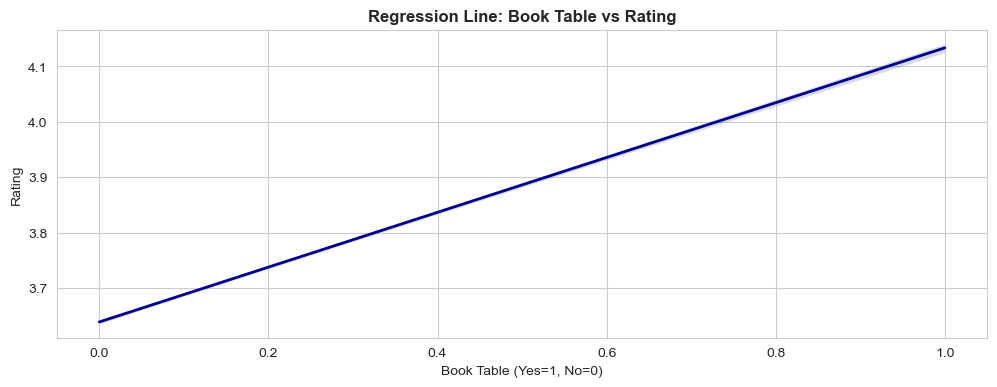

In [109]:
# Regression Plot
sns.regplot(
    x=df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0), 
    y=df['rate'], 
    scatter=False,
    line_kws={'color': 'darkblue', 'lw': 2}
)

plt.gcf().set_size_inches(12, 4)
plt.title("Regression Line: Book Table vs Rating", fontsize=12, fontweight='bold')
plt.xlabel("Book Table (Yes=1, No=0)")
plt.ylabel("Rating")
plt.show()

**Insights**

* There is a clear positive linear relationship between allowing table booking and the restaurant rating, indicating that restaurants offering table booking tend to have higher ratings.
* The trend implies that customers may associate table reservation options with better service quality or overall restaurant professionalism.

#### Correlation between Online Ordering Availability and Rating

**Null Hypothesis:** There is no significant relationship between online order availability and the restaurant rating.

**Alternative Hypothesis:** There is a significant relationship between online order availability and the restaurant rating.

In [113]:
pearson_coef, p_value = stats.pearsonr(df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0), df['rate'])
print("Pearson Correlation Coefficient: ", pearson_coef)
print("P-value: ", p_value)

Pearson Correlation Coefficient:  0.05957935177885016
P-value:  6.831038629118774e-42


**Interpretation**

The **Pearson Correlation Coefficient** of **0.059** indicates a **very weak positive correlation** between the two variables. The **p-value** of approximately **6.83e-42** is extremely small, indicating that the observed correlation is **statistically significant**. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between the two variables, although the strength of the correlation is very weak.

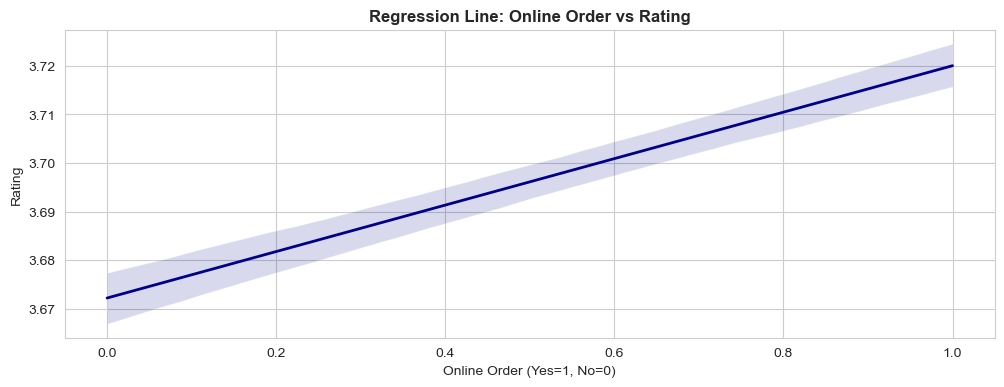

In [115]:
# Regression Plot
sns.regplot(
    x=df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0), 
    y=df['rate'], 
    scatter=False,
    line_kws={'color': 'darkblue', 'lw': 2}
)

plt.gcf().set_size_inches(12, 4)
plt.title("Regression Line: Online Order vs Rating", fontsize=12, fontweight='bold')
plt.xlabel("Online Order (Yes=1, No=0)")
plt.ylabel("Rating")
plt.show()

**Insights**

* The regression line indicates a slight positive relationship between offering online ordering and restaurant ratings, suggesting a marginal increase in ratings for restaurants that provide online order options.
* Despite the weak slope, the presence of a consistent upward trend implies that customers may favor the convenience of online ordering, which is reflected mildly in their ratings.
* The narrow confidence interval around the regression line shows a reasonable level of certainty in this trend across the sample.
* This suggests that while online ordering does not drastically affect ratings, it could still contribute positively to customer perception and satisfaction.

In [117]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines
0,jalsa,Yes,Yes,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
1,spice elephant,Yes,No,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine


In [118]:
df.shape

(51717, 10)

## Machine Learning Pipeline

#### Model Building

In [121]:
#Exporting DataFrame to CSV
#df.to_csv('cleaned_data.csv', index=False)   

In [122]:
# Reloading the cleaned dataset
#df = pd.read_csv('cleaned_data.csv')

In [123]:
# Defining features (X) and target (y)
X = df.drop(['rate'], axis = 1)
y = df['rate']

In [124]:
# Train-test split
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train_df.shape, X_test_df.shape)

(41373, 9) (10344, 9)


In [125]:
# Identifying numerical and categorical columns
numerical_cols = ["votes", "cost2plates"]
categorical_cols = ["name", "location", "category", "rest_type", "online_order", "book_table", "grouped_cuisines",]

In [126]:
# Numerical pipeline (Standard Scaler)
num_pipeline = Pipeline(steps=[("scaler", StandardScaler())])

# Categorical pipeline (One Hot Encoder and Standard Scaler)
cat_pipeline = Pipeline(steps=[
("one_hot_encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
("scaler", StandardScaler(with_mean=False))
])


# Column transformer applying the pipelines
preprocessor = ColumnTransformer(
transformers=[("num_pipeline", num_pipeline, numerical_cols),
              ("cat_pipeline", cat_pipeline, categorical_cols)])

#### Model Training, Evaluation, and Selection

In [128]:
X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

In [129]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [130]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(),
    'XGBoost': XGBRegressor(),
}

model_list = []
r2_list = []
best_model_name = None
best_model_r2 = -float('inf')
best_model_pred = None

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Model Training

    # Model Evaluation
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print(f"Training set - RMSE: {model_train_rmse:.4f}, MAE: {model_train_mae:.4f}, R2: {model_train_r2:.4f}")
    print(f"Test set - RMSE: {model_test_rmse:.4f}, MAE: {model_test_mae:.4f}, R2: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)

    # Model Selection
    if model_test_r2 > best_model_r2:
        best_model_r2 = model_test_r2
        best_model_name = list(models.keys())[i]
        best_model_pred = y_test_pred

    print('=' * 35)
    print('\n')

print(f"\nBest model: {best_model_name} with R2 score: {best_model_r2:.4f}")
print("Predictions of the best model:")
print(best_model_pred)

Random Forest Regressor
Training set - RMSE: 0.0380, MAE: 0.0144, R2: 0.9908
Test set - RMSE: 0.0921, MAE: 0.0346, R2: 0.9456


Decision Tree
Training set - RMSE: 0.0139, MAE: 0.0024, R2: 0.9988
Test set - RMSE: 0.0947, MAE: 0.0225, R2: 0.9425


K-Neighbors Regressor
Training set - RMSE: 0.1424, MAE: 0.0755, R2: 0.8703
Test set - RMSE: 0.1903, MAE: 0.1084, R2: 0.7679


Learning rate set to 0.073726
0:	learn: 0.3834802	total: 265ms	remaining: 4m 24s
1:	learn: 0.3729316	total: 338ms	remaining: 2m 48s
2:	learn: 0.3638621	total: 407ms	remaining: 2m 15s
3:	learn: 0.3556531	total: 465ms	remaining: 1m 55s
4:	learn: 0.3489408	total: 530ms	remaining: 1m 45s
5:	learn: 0.3427390	total: 596ms	remaining: 1m 38s
6:	learn: 0.3367650	total: 653ms	remaining: 1m 32s
7:	learn: 0.3316359	total: 709ms	remaining: 1m 27s
8:	learn: 0.3274388	total: 770ms	remaining: 1m 24s
9:	learn: 0.3232544	total: 836ms	remaining: 1m 22s
10:	learn: 0.3195100	total: 888ms	remaining: 1m 19s
11:	learn: 0.3165290	total: 950ms	re

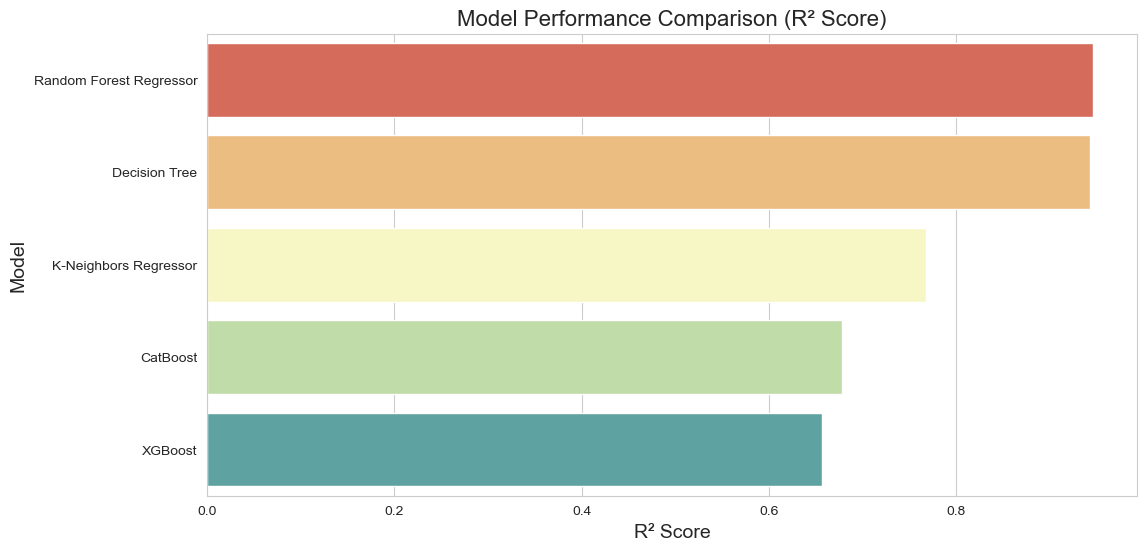

In [131]:
data = pd.DataFrame({
    'Model': model_list,
    'R² Score': r2_list
})

plt.figure(figsize=(12, 6))
sns.barplot(x='R² Score', y='Model', data=data, palette='Spectral')
plt.title('Model Performance Comparison (R² Score)', fontsize=16)
plt.xlabel('R² Score', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()

## Model Evaluation Summary

As I embarked on building the restaurant rating prediction system, I tried various regression models to find the one that would give the most accurate and reliable predictions. After extensive evaluation, the **Random Forest Regressor** emerged as the clear winner, with an outstanding **R² score of around 0.95** on the test set. This meant that it explained **95% of the variance** in the restaurant ratings, which is an impressive result.

I compared the Random Forest model with others like **Decision Tree**, **K-Neighbors Regressor**, **CatBoost**, and **XGBoost**. While the **Decision Tree** model was close, with an R² score of around **0.94**, it tended to **overfit** — performing exceptionally well on the training data but not generalizing as well on the test data. On the other hand, **Random Forest** managed to balance both training and testing performance, making it the most reliable model to deploy in real-world scenarios.

## Model Choice Justification

Out of ~52,000 total records, 2257 records have ratings below 3.0 `(df[df['rate'] < 3.0].shape[0])`. To better model these minority cases and capture subtle nonlinear relationships in the data, CatBoost and XGBoost models were also explored. Despite their slightly lower performance overall, these models are known to handle imbalanced data, categorical features, and nonlinear interactions more effectively.

Hence, their inclusion was a strategic choice to explore how the models behave on the tail end of the rating distribution, potentially improving insights for low-performing entities.

## Conclusion

The results of this project demonstrate that machine learning models, especially ensemble-based ones like Random Forest, can provide accurate and reliable predictions. It’s the model I would trust most for real-world deployment, where predictions need to be both reliable and scalable. Even though **CatBoost** and **XGBoost** didn’t quite reach the performance of **Random Forest**, they were incredibly useful in identifying patterns in the low-rated data — something I may not have noticed with just the **Random Forest** model.

## Future Work

To further enhance the system, especially in capturing edge cases, the following future work is recommended:

* **Hyperparameter Tuning for CatBoost/XGBoost** – Improving their performance with techniques like grid search, etc.
* **SMOTE or Resampling Techniques** – Balancing the dataset to give more weight to minority entries (e.g., `rate < 3.0`) could make models more sensitive to underrepresented patterns.
* **Model Stacking or Blending** – Combining multiple models (e.g., Random Forest + XGBoost) to capture different aspects of the data distribution.